# Replicate Figure 1

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact,fixed
plt.rcParams['figure.figsize'] = 10, 8
np.set_printoptions(precision=2) 

In [2]:
import Contract

In [5]:
def Figure1(cC, idl = False):
    cCF = cC.fcommit()
    cCRP = cC.reneg(cCF)
    y = cC.y
    
    c1min = 0
    c1max = 160
    c1 = np.arange(0, c1max, c1max/20)
    c1_ = np.arange(40, c1max-40, c1max/20)   # to clip indifference curves
    ubar0 = cC.PVU(cCF[1:3], 1.0)
    idc0 = cC.indif(ubar0, 1.0)
    ubar1 = cC.PVU(cCF[1:3],cC.beta)
    idc1 = cC.indif(ubar1,cC.beta)
    ubar0RP = cC.PVU(cCRP[1:3], 1.0)
    idc0RP = cC.indif(ubar0RP,1.0)
    ubar1RP = cC.PVU(cCRP[1:3], cC.beta)
    idc1RP = cC.indif(ubar1RP,cC.beta)

    btr = cC.beta**(1/cC.rho)
    q1 = (cCF[1]+cCF[2])/(1+btr)
    q2 = btr*q1
    
    fig, ax = plt.subplots()

    # indifference curves
    ax.plot(c1_,idc0(c1_),color='blue')  # --Zeros's indif through F        
    ax.plot(c1_,idc1(c1_),color='red')   # --One's indif through F
    
    # rays
    ax.plot(c1, c1,':',color='black')
    ax.plot(c1, cC.beta**(1/cC.rho)*c1,':',color='black')
    # isoprofit line(s)
    isoprofline = cC.isoprofit(cC.profit(cCF,cC.y)-(y[0]-cCF[0]), y)
    ax.plot(c1,  isoprofline(c1),':' )

    isoproflineK = cC.isoprofit(cC.profit(cCF,cC.y)-(y[0]-cCF[0])+cC.kbar(), y)
    ax.plot(c1,  isoproflineK(c1),':' )

    # Axes
    ax.spines['right'].set_color('none'), ax.spines['top'].set_color('none')
    ax.set_ylim((c1min, c1max*0.9)), ax.set_xlim((c1min, c1max*0.9))
    ax.xaxis.tick_bottom(), ax.yaxis.tick_left()
    ax.set_xlabel('$c_{1}$'); ax.set_ylabel('$c_{2}$')
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    
    #-- Intercept points on y axis
    ax.scatter(cCF[1]+cCF[2],0, marker='o',color='b')
    ax.scatter(cCF[1]+cCF[2]- cC.kbar(),0, marker='o',color='b')
    ax.text(cCF[1]+cCF[2] + 1, -6, r'$c_1^F+c_2^F$', fontsize=12)
    ax.text(cCRP[1] + cCRP[2] - cC.kbar() - 6, -6, r'$c_1^F+c_2^F -\bar \kappa$', fontsize=13)
    ax.text(c1max-50, c1max-55, r'$c_2=c_1$', fontsize=12)
    ax.text(c1max-35, btr*(c1max-40), r'$c_2=\beta^\frac{1}{\rho} \cdot c1$', fontsize=12)
    
    # label the points
    ax.text(cCF[1]-1, cCF[2]+3, r'$F$', fontsize=15)
    ax.text(cCRP[1]-4, cCRP[2]-4, r'$R$', fontsize=15)   #-- temporarily R, usually P.
    #ax.text(cCRP[1], -6, r'$c^{R}_{1}$', fontsize=15)
    #ax.text(-8, cCRP[2], r'$c^{R}_{2}$', fontsize=15)
    #ax.text(cCF[1], -6, r'$c^{*}_{1}$', fontsize=15)
    #ax.text(-8, cCF[2], r'$c^{*}_{2}$', fontsize=15)
    

    # trick to display contract points and coordinate lines http://bit.ly/1CaTMDX
    xx = [cCF[1], cCRP[1]]
    yy = [cCF[2], cCRP[2]]
    ax.scatter(xx, yy, s=50, marker='o',color='b')
    
    if idl:  #indicator lines
        [plt.plot([dot_x, dot_x] ,[0, dot_y],':',linewidth = 1,color='black' ) 
         for dot_x, dot_y in zip(xx,yy) ] 
        [plt.plot([0, dot_x] ,[dot_y, dot_y],':',linewidth = 1,color='black' ) 
         for dot_x, dot_y in zip(xx,yy) ]



In [6]:
def Fig1(beta = 0.4, rho = 0.8):
    cC = Contract.Competitive(beta)
    cC.rho = rho
    Figure1(cC)

To see things more clearly, without having to zoom in, we'll use slightly unusual parameters, but the essential relationships hold for more reasonable assumptions.

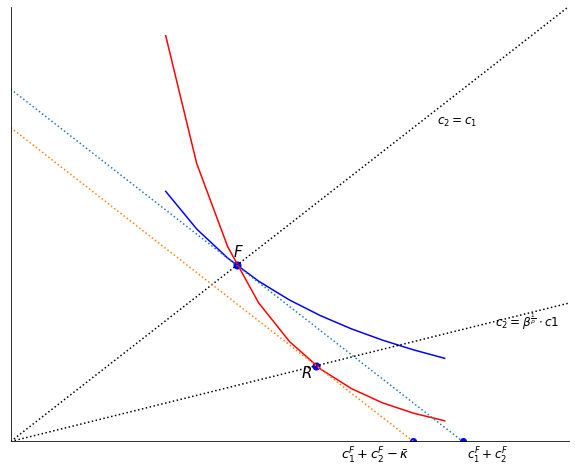

In [9]:
Fig1()

To use the widget sliders you must run this on a jupyter notebooks server.

In [10]:
interact(Fig1, beta = (0.3, 0.95, 0.05), rho=(0.3,1.2,0.1) );

interactive(children=(FloatSlider(value=0.4, description='beta', max=0.95, min=0.3, step=0.05), FloatSlider(va…